<a href="https://colab.research.google.com/github/Mohan1github/ML_projects/blob/main/text_classification_using_langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install langgraph langchain langchain.core langchain.community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: langchain.core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [4]:
from typing import TypedDict , List
from langgraph.graph import StateGraph , END
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display,Image

1.Defining the state and llm
2.Define the node function
3.Create the tools and build tools
4.Visualize the workflow
5.Test the pipeline

In [5]:
class State(TypedDict):
  text:str
  classification:str
  entities:list[str]
  summary:str


In [6]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 3.3 MB/s eta 0:00:00


In [19]:
from langchain_groq import ChatGroq

llm = ChatGroq(
    temperature = 0,
    groq_api_key = "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",
    model_name="llama-3.3-70b-versatile"
)

result = llm.invoke("What is love")
print(result.content)

Love is a complex and multifaceted concept that has been debated and explored by philosophers, psychologists, scientists, and many others for centuries. While there's no single, definitive answer, here's a comprehensive overview:

**Definition:** Love is a strong feeling of affection, attachment, or devotion to a person, place, or thing. It can be romantic, platonic, familial, or self-love.

**Types of love:**

1. **Romantic love**: Intense, passionate, and often all-consuming, this type of love is typically associated with romantic relationships.
2. **Unconditional love**: A selfless, unwavering, and accepting love, often found in familial relationships or spiritual contexts.
3. **Platonic love**: A deep, non-romantic affection between friends, often characterized by mutual respect and trust.
4. **Familial love**: The bond between family members, such as parents and children, siblings, or extended family.
5. **Self-love**: The practice of accepting, caring for, and valuing oneself, wh

In [27]:
def classification_node(state:State):
  prompt = PromptTemplate(
      input_varieble = ["text"],
      template = "Classify the following into blogs,news,research and some more informations. \n\nText:{text}\n\nCategory"
  )

  message = HumanMessage(content=prompt.format_prompt(text=state["text"]))
  classification = llm.invoke([message]).content.strip()
  return {"classification":classification}


def entity_extraction_node(state:State):
  prompt = PromptTemplate(
      input_varieble = ["text"],
      template = "Classify the following into name,objects and some more informations. \n\nText:{text}\n\nCategory"
  )

  message = HumanMessage(content=prompt.format_prompt(text=state["text"]))
  entity = llm.invoke([message]).content.strip()
  return {"Entity":entity}
def summarization_node(state:State):
  prompt = PromptTemplate(
      input_varieble = ["text"],
      template = "Classify the following into name,objects and some more informations. \n\nText:{text}\n\nCategory"
  )

  message = HumanMessage(content=prompt.format_prompt(text=state["text"]))
  summary = llm.invoke([message]).content.strip()
  return {"summary":summary}




In [28]:
workflow = StateGraph(State)

workflow.add_node("classification_node",classification_node)
workflow.add_node("entity_extraction_node",entity_extraction_node)
workflow.add_node("summarization_node",summarization_node)

workflow.set_entry_point("classification_node")

workflow.add_edge("classification_node","entity_extraction_node")
workflow.add_edge("entity_extraction_node","summarization_node")
workflow.add_edge("summarization_node",END)

app = workflow.compile()

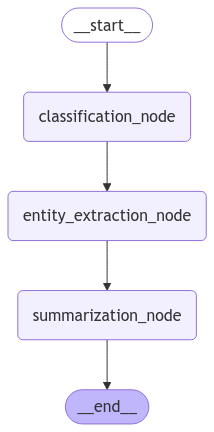

In [22]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method = MermaidDrawMethod.API
        )
    )
)

In [29]:
SAMPLE_TEXT = """ Explain me about the working of the GAN in gen ai """
state_input = {"text":SAMPLE_TEXT}
kabins = app.invoke(state_input)

ValidationError: 5 validation errors for HumanMessage
content.str
  Input should be a valid string [type=string_type, input_value=StringPromptValue(text='C...in gen ai \n\nCategory'), input_type=StringPromptValue]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('text', 'Classify the fo...in gen ai \n\nCategory'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('text', 'Classify the fo...in gen ai \n\nCategory'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('type', 'StringPromptValue'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.10/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('type', 'StringPromptValue'), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.10/v/dict_type

In [40]:
print("classification report",result["classification"])
print("entity report",result["entities"])
print("summary report",result["summary"])

TypeError: 'AIMessage' object is not subscriptable